# Seasonality Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Load the data
df = pd.read_csv('/content/EE467_EDA_Data_Group5_Solar.csv', parse_dates=['Timestamp'])
df = df.set_index('Timestamp')

In [2]:
df.describe()

,Value (MW)
count,35055.000000
mean,353.849109
std,559.824521
min,0.000000
25%,0.000000
50%,7.330000
75%,529.075000
max,2620.030000


In [4]:
df.isnull()

,Value (MW)
Timestamp,
2015-01-01 00:00:00+01:00,True
2015-01-01 01:00:00+01:00,True
2015-01-01 02:00:00+01:00,True
2015-01-01 03:00:00+01:00,True
2015-01-01 04:00:00+01:00,True
...,...
2018-12-31 19:00:00+01:00,False
2018-12-31 20:00:00+01:00,False
2018-12-31 21:00:00+01:00,False


In [5]:
len(df)

35064

In [6]:
df.isnull().sum()

,0
Value (MW),9


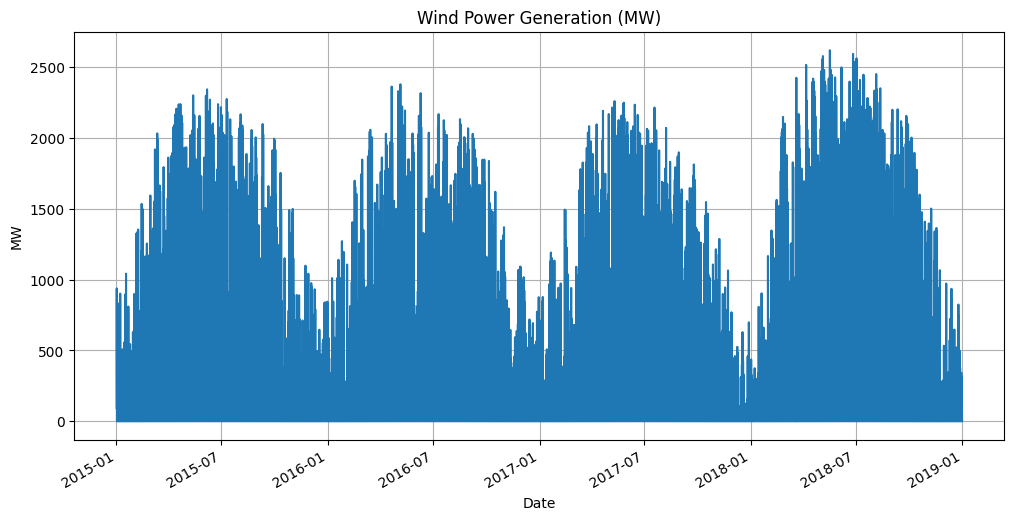

In [7]:
# Handle missing values
df = df.dropna()
# Plot the data
plt.figure(figsize=(12, 6))
df['Value (MW)'].plot()
plt.title('Wind Power Generation (MW)')
plt.ylabel('MW')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [8]:
df.isnull().sum()

,0
Value (MW),0


In [9]:
df.count()

,0
Value (MW),35055


## Stationarity Tests

In [10]:
# ADF Test
result = adfuller(df['Value (MW)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -8.984990005980288
p-value: 7.14088298885237e-15
Critical Values:
	1%: -3.4305368294940584
	5%: -2.8616225740198344
	10%: -2.5668139515554786


Highly negative ADF statistic and p value less than 0.5 suggest that the series is stationary.

In [11]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
result_kpss = kpss(df['Value (MW)'])
print('KPSS Statistic:', result_kpss[0])
print('p-value:', result_kpss[1])
print('Critical Values:')
for key, value in result_kpss[3].items():
    print(f'\t{key}: {value}')

KPSS Statistic: 1.8493743875041824
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/tmp/ipython-input-1896826590.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(df['Value (MW)'])


KPSS test is opposite of ADF Test.  
KPSS Test Hypotheses

Null hypothesis (H₀): The series is stationary (around a mean or trend).

Alternative (H₁): The series is non-stationary (has a unit root / trend).

KPSS Statistic: 0.3147
This is the test statistic. You compare it to critical values.

Critical Values:

10%: 0.347

5%: 0.463

2.5%: 0.574

1%: 0.739

Since 0.3147 < 0.347 (10% level) → you fail to reject the null hypothesis at all usual significance levels.
This means the series is likely stationary.

p-value: 0.1
This suggests that the test statistic is at or below the 10% critical value, again supporting stationarity.

Conclusion from KPSS:
- Data shows no evidence of non-stationarity.
- Combined with the ADF test (which also rejected non-stationarity), we have very strong confirmation that our series is stationary.

## Autocorrelation Analysis

<Figure size 1200x600 with 0 Axes>

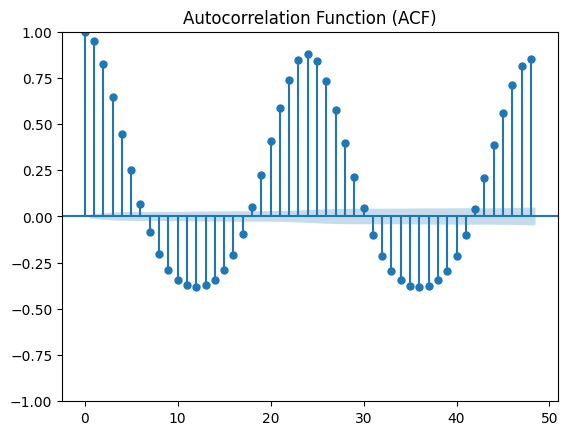

<Figure size 1200x600 with 0 Axes>

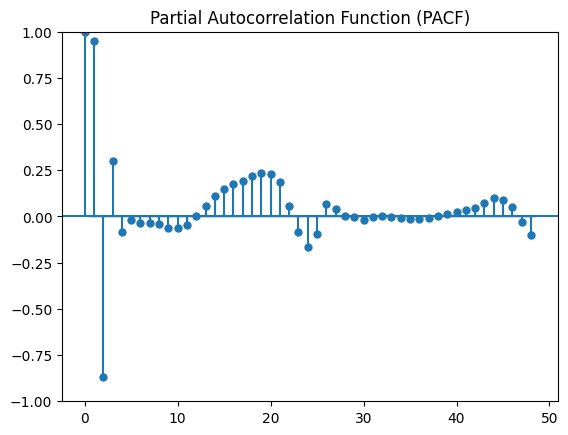

In [12]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(df['Value (MW)'], lags=48, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Value (MW)'], lags=48, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## STL Decomposition

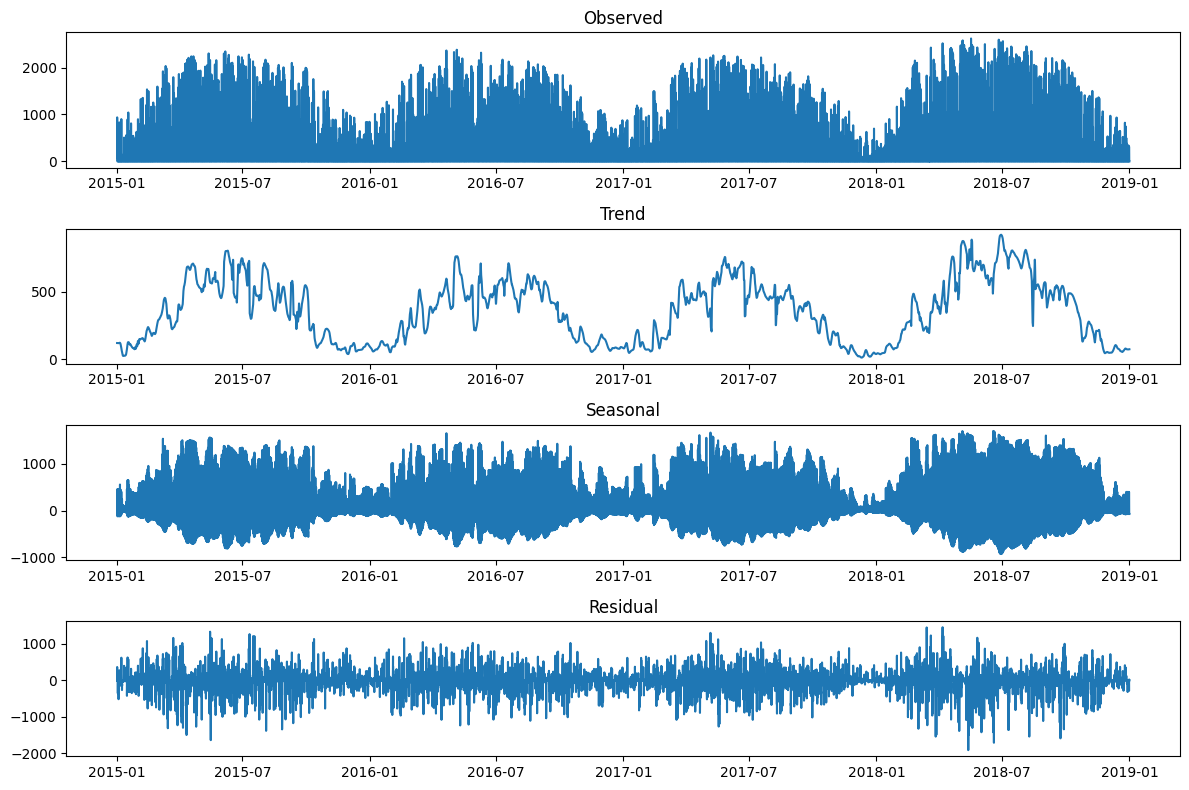

In [13]:
# STL Decomposition
stl = STL(df['Value (MW)'], period=24, robust=True)
result = stl.fit()

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()

## Seasonal Differencing

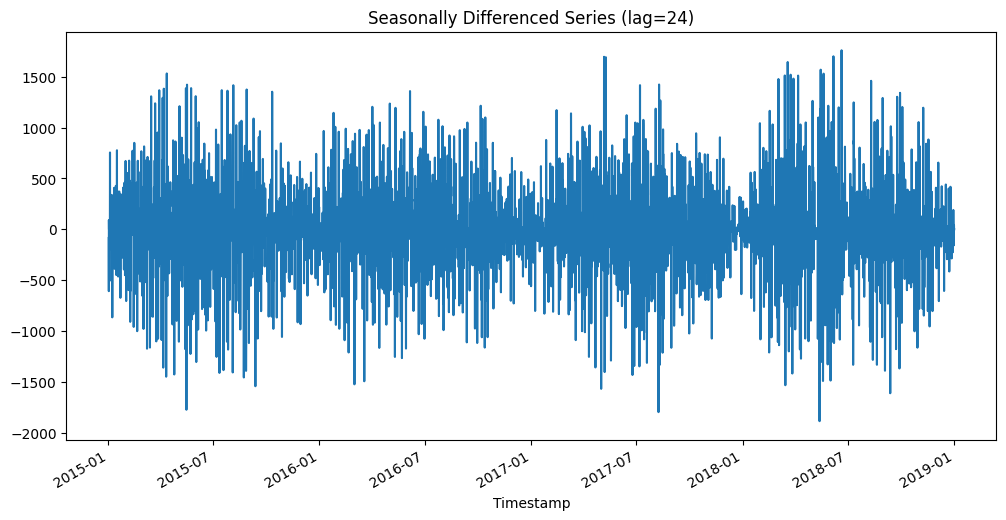

ADF Statistic on differenced data: -33.28055711466295
p-value: 0.0


In [14]:
# Seasonal differencing (24 hours)
seasonal_diff = df['Value (MW)'].diff(24).dropna()

plt.figure(figsize=(12, 6))
seasonal_diff.plot()
plt.title('Seasonally Differenced Series (lag=24)')
plt.show()

# ADF test on differenced data
result_diff = adfuller(seasonal_diff)
print('ADF Statistic on differenced data:', result_diff[0])
print('p-value:', result_diff[1])

# Forecasting Models

## Statistical Model (SARIMA)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

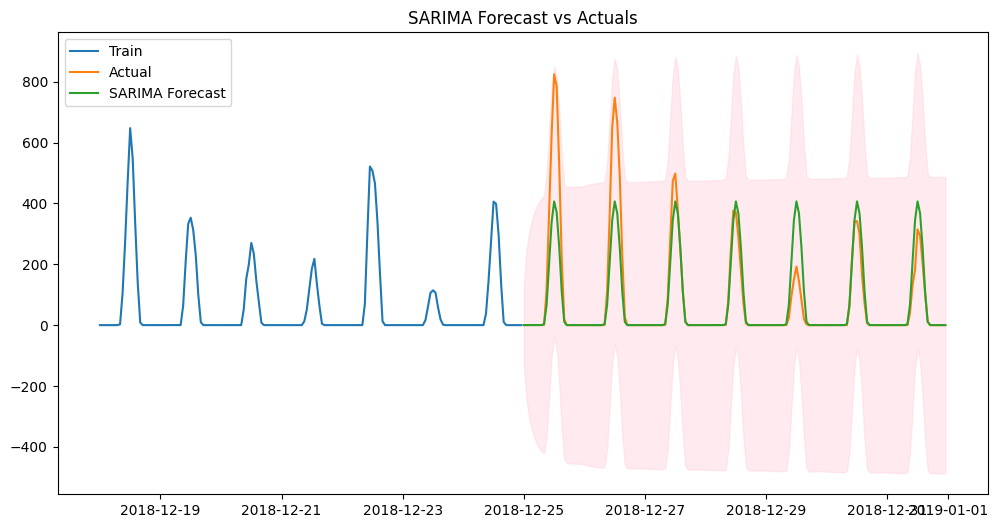

SARIMA Metrics:
RMSE: 85.92
MAE: 34.24


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Split data into train and test (last week for testing)
train = df.iloc[:-168]
test = df.iloc[-168:]

# SARIMA Model
order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, s)

model = SARIMAX(train['Value (MW)'],
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast
forecast = results.get_forecast(steps=168)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index[-168:], train['Value (MW)'][-168:], label='Train')
plt.plot(test.index, test['Value (MW)'], label='Actual')
plt.plot(test.index, forecast_mean, label='SARIMA Forecast')
plt.fill_between(test.index,
                conf_int.iloc[:, 0],
                conf_int.iloc[:, 1],
                color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actuals')
plt.legend()
plt.show()

# Metrics
mse = mean_squared_error(test['Value (MW)'], forecast_mean)
rmse = sqrt(mse)
mae = mean_absolute_error(test['Value (MW)'], forecast_mean)

print(f'SARIMA Metrics:')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

## Machine Learning Model (XGBoost)

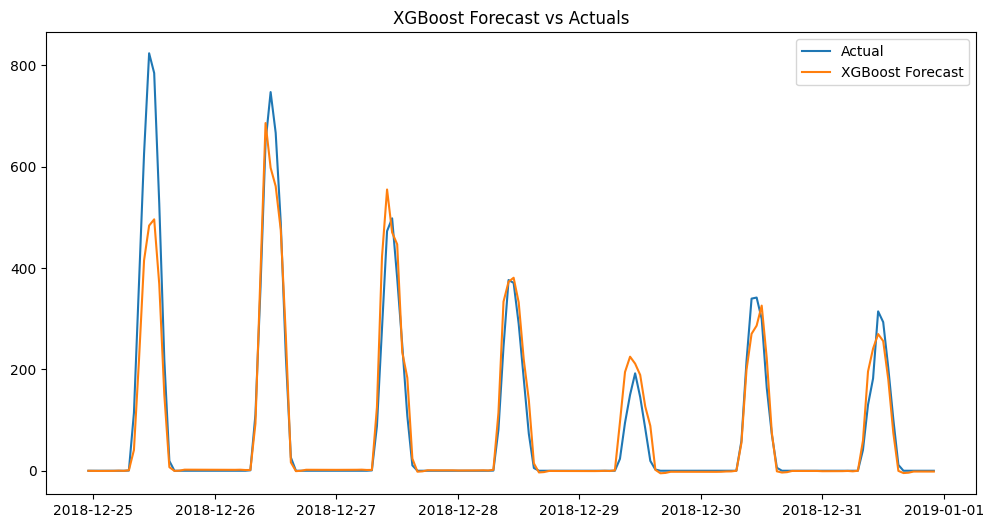

XGBoost Metrics:
RMSE: 51.87
MAE: 21.18


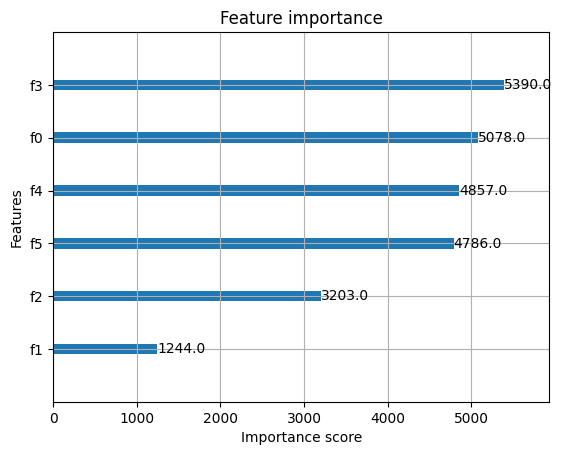

In [23]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

# Feature engineering
def create_features(df):
    df = df.copy()
    df.index = pd.to_datetime(df.index, utc=True) # Explicitly convert index to datetime objects with utc=True
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['lag_24'] = df['Value (MW)'].shift(24)
    df['lag_48'] = df['Value (MW)'].shift(48)
    df['rolling_mean_24'] = df['Value (MW)'].rolling(24).mean()
    return df

df_feat = create_features(df)
df_feat = df_feat.dropna()

# Split data
X = df_feat.drop('Value (MW)', axis=1)
y = df_feat['Value (MW)']
X_train, X_test = X.iloc[:-168], X.iloc[-168:]
y_train, y_test = y.iloc[:-168], y.iloc[-168:]

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror',
                            n_estimators=1000,
                            learning_rate=0.01,
                            max_depth=5,
                            subsample=0.8,
                            colsample_bytree=0.8,
                            early_stopping_rounds=10,
                            random_state=42)

model_xgb.fit(X_train_scaled, y_train,
              eval_set=[(X_test_scaled, y_test)],
              verbose=False)

# Predictions
y_pred = model_xgb.predict(X_test_scaled)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='XGBoost Forecast')
plt.title('XGBoost Forecast vs Actuals')
plt.legend()
plt.show()

# Metrics
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred)

print(f'XGBoost Metrics:')
print(f'RMSE: {rmse_xgb:.2f}')
print(f'MAE: {mae_xgb:.2f}')

# Feature importance
xgb.plot_importance(model_xgb)
plt.show()

# Model Comparison

## Performance Metrics Comparison

In [24]:
# Create comparison table
metrics = pd.DataFrame({
    'Model': ['SARIMA', 'XGBoost'],
    'RMSE': [rmse, rmse_xgb],
    'MAE': [mae, mae_xgb]
})

print(metrics)

     Model       RMSE        MAE
0   SARIMA  85.923513  34.236896
1  XGBoost  51.866018  21.180815


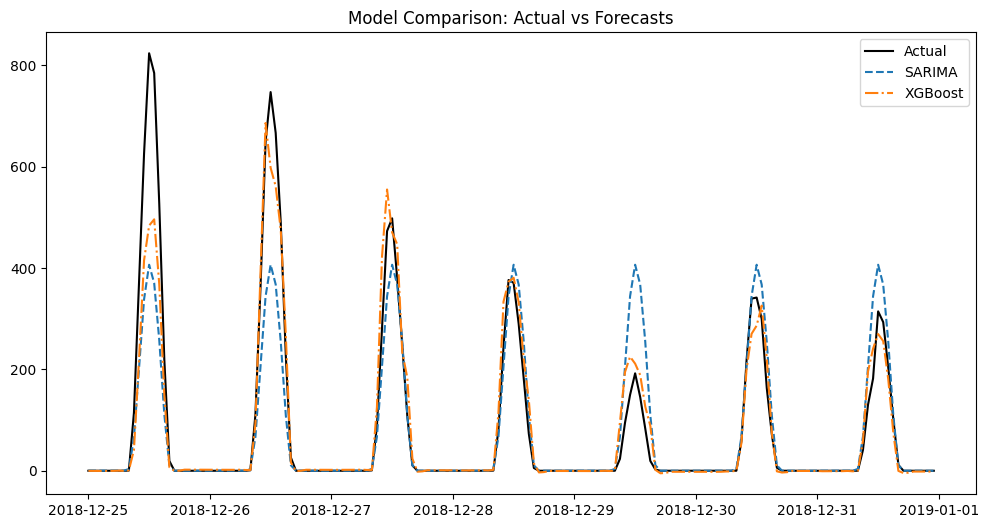

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Value (MW)'], label='Actual', color='black')
plt.plot(test.index, forecast_mean, label='SARIMA', linestyle='--')
plt.plot(test.index, y_pred, label='XGBoost', linestyle='-.')
plt.title('Model Comparison: Actual vs Forecasts')
plt.legend()
plt.show()

## Observations and Analysis